# 2. Linear regression, Logistic regression, Decision Tree, SVM, Navie Bayes, KNN

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.metrics import classification_report,mean_squared_error, r2_score
import numpy as np 

from math import sqrt
import matplotlib.pyplot as plt

## Regressors

### Linear Regression

In [96]:
diabetes = datasets.load_diabetes()
x = diabetes.data
x = x[:,np.newaxis,-2]
y = diabetes.target

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

In [97]:
clf = LinearRegression()
clf.fit(x_train,y_train)
yhat = clf.predict(x_test)

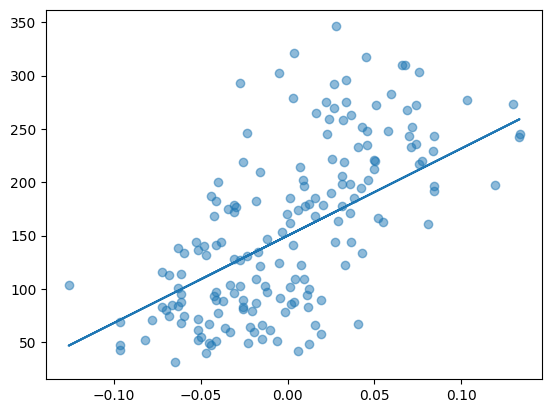

In [98]:
plt.scatter(x_test,y_test,alpha=.5)
plt.plot(x_test,yhat)

In [104]:
print("Coefficients of linear regressor ",clf.coef_)
print("Mean square error ",mean_squared_error(y_test,yhat))
print("Root Mean Square Error ",sqrt(mean_squared_error(y_test,yhat)))
print("R-square error ",r2_score(y_test, yhat))

Coefficients of linear regressor  [817.54431051]
Mean square error  3608.745097066948
Root Mean Square Error  60.07283160520193
R-square error  0.4078231222906489


### Logistic Regression

In [126]:
bc = datasets.load_breast_cancer()

x = bc.data
y = bc.target

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.4)

In [147]:
reg = LogisticRegression()
reg.fit(x_train,y_train)
yhat = reg.predict(x_test)
print("Predicting the new instance ",bc.target_names[reg.predict(np.array(x[55]).reshape(1,-1))][0])
print(classification_report(y_test,yhat))

Predicting the new instance  benign
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        74
           1       1.00      0.96      0.98       154

    accuracy                           0.97       228
   macro avg       0.96      0.98      0.97       228
weighted avg       0.98      0.97      0.97       228



c:\Users\sainithin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### B. Classfiers

In [93]:
iris = datasets.load_iris()

x = iris.data
y = iris.target

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.80)

In [95]:
classifiers = [DecisionTreeClassifier(), SVC(), GaussianNB(), KNeighborsClassifier()]
new_item = np.array([0.1, 3.5, 3.4, 0.8]).reshape(1,-1)
for clf in classifiers:
    clf.fit(x_train, y_train)
    y_hat = clf.predict(x_test)
    print(f'{clf.__class__.__name__}')
    print(f'prediction value : {iris.target_names[clf.predict(new_item)][0]}')
    print(classification_report(y_test, y_hat)) 

DecisionTreeClassifier
prediction value : setosa
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.92      0.96        12
           2       0.83      1.00      0.91         5

    accuracy                           0.97        30
   macro avg       0.94      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

SVC
prediction value : setosa
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.92      0.96        12
           2       0.83      1.00      0.91         5

    accuracy                           0.97        30
   macro avg       0.94      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

GaussianNB
prediction value : virginica
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
          